# Logistic Regression Coefficient

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv',nrows=50000)
data.shape

(50000, 133)

In [3]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

In [5]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['target', 'ID'], axis=1),
                                                    data['target'],
                                                    test_size=0.3,
                                                    random_state=0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(35000, 112) (35000,)
(15000, 112) (15000,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

Lets use Logistic Regression and L2 penalty for regularization. I want to evaluate coefficients magnitudes and not shrunk them to zero. Ideally, I want to avoid regularisation at all, so the coefficients
are not affected (modified) by the penalty of the regularisation


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [10]:
sel_ = SelectFromModel(LogisticRegression(C=1000,penalty='l2',random_state=0))


In [11]:
sel_.fit(X_train.fillna(0),y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        prefit=False, threshold=None)

In [12]:
sel_.get_support()

array([False, False, False, False, False,  True, False, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True, False, False, False, False,  True,  True, False,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True, False,
        True,  True, False, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False])

In [13]:
selected_features=X_train.columns[(sel_.get_support())]

In [14]:
len(selected_features)

43

In [15]:
np.sum(sel_.estimator_.coef_ == 0)

0

In [16]:
sel_.estimator_.coef_.mean()

0.011463312278900111

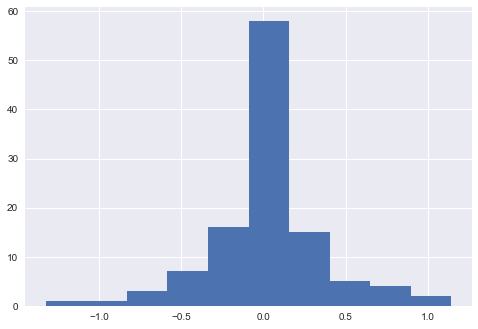

In [17]:
pd.Series(sel_.estimator_.coef_.ravel()).hist()

We can see some coeeficients to be positive and some coefficients to be negative.  The absolute value of the coefficients say about the importance of the features. So in order to do feature selection we use positive values for filtering

In [18]:
np.abs(sel_.estimator_.coef_).mean()

0.21843329838915126

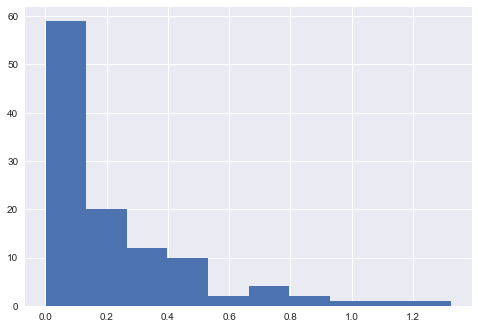

In [19]:
pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist()

We can see that many values are greater then the mean of absolute value of coefficients. TO be precise 42 values are greater  than the mean and as we can see by sel_.get_support()
SelectFrom model by default selects the coefficient whose absolute values are greater then mean of the absolute values of coefficients

# Regression Coefficients are affected by regularisation

#### Fit a few logistic regression models decreasing the penalty of the regularisation.

In [20]:
coefs_df = []
for c in [1, 10, 100, 1000]:
    logit = LogisticRegression(C=c, penalty='l2')
    logit.fit(scaler.transform(X_train.fillna(0)), y_train)
    
    # store the coefficients of the variables in a list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [21]:
coefs = pd.concat(coefs_df, axis=1)
coefs.columns = [1, 10, 100, 1000]
coefs.index=X_train.columns
coefs.head()

,1,10,100,1000
v1,-0.086503,-0.145506,-0.012400,0.457057
v2,0.118429,0.118211,0.116482,0.115372
v4,-0.020853,-0.024017,-0.027760,-0.029231
v5,0.095464,0.096687,0.096266,0.095197
v6,0.190545,0.195714,0.198633,0.199696


In [22]:
coefs.columns = np.log([1, 10, 100, 1000])
coefs.head()

,0.0,2.302585092994046,4.605170185988092,6.907755278982137
v1,-0.086503,-0.145506,-0.012400,0.457057
v2,0.118429,0.118211,0.116482,0.115372
v4,-0.020853,-0.024017,-0.027760,-0.029231
v5,0.095464,0.096687,0.096266,0.095197
v6,0.190545,0.195714,0.198633,0.199696


Now let us plot the coefficients and check how they change with regularization

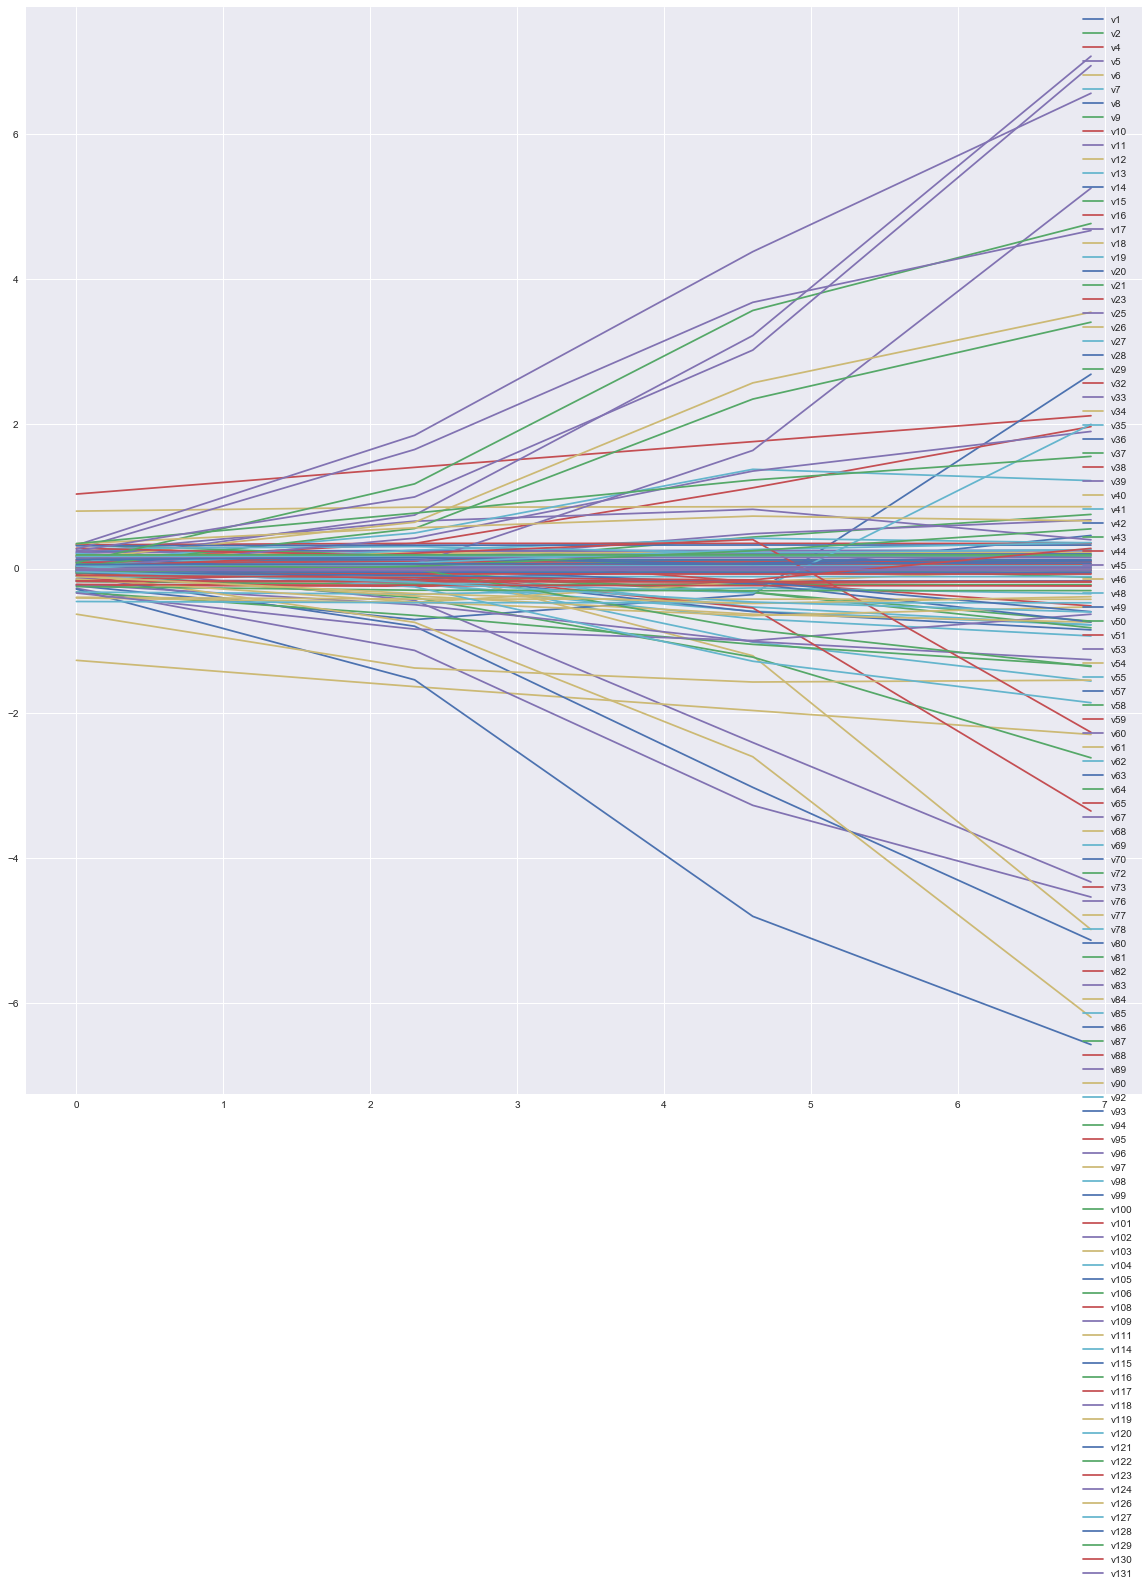

In [23]:
coefs.T.plot(figsize=(20,20),legend=False)
plt.legend(loc='upper right')

So now we can see how for same variable how the coefficients changes based on the reguarization. Hence we say though regularizations helps avoid over fitting it masks the true relationship between the predictor X and the outcome